In [30]:
import numpy as np
import pandas as pd

In [31]:
df = pd.read_csv('./moviereviews.csv')

In [32]:
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   2000 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [34]:
df.isna().sum()

label      0
review    35
dtype: int64

**TASK: Remove any reviews that are NaN**

In [35]:
df = df.dropna()

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1965 non-null   object
 1   review  1965 non-null   object
dtypes: object(2)
memory usage: 46.1+ KB


In [37]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [38]:
# df[df['review'].str.strip() =='']

In [39]:
df = df[df['review'].str.strip() !='']

In [40]:
df

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   1938 non-null   object
 1   review  1938 non-null   object
dtypes: object(2)
memory usage: 45.4+ KB


**TASK: Confirm the value counts per label:**

In [42]:
#CODE HERE
df['label'].value_counts()

label
neg    969
pos    969
Name: count, dtype: int64

## EDA on Bag of Words

**Bonus Task: Can you figure out how to use a CountVectorizer model to get the top 20 words (that are not english stop words) per label type? Note, this is a bonus task as we did not show this in the lectures. But a quick cursory Google search should put you on the right path.  [Click me for a big hint](https://stackoverflow.com/questions/16288497/find-the-most-common-term-in-scikit-learn-classifier)**

In [43]:
#CODE HERE
from sklearn.feature_extraction.text import TfidfVectorizer

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(stop_words='english')

In [46]:
neg = df[df['label'] == 'neg']

In [47]:
df[df['review'] == 'pos']

,label,review


In [48]:
neg

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
4,neg,my first press screening of 1998 and already i...
5,neg,"to put it bluntly , ed wood would have been pr..."
6,neg,"synopsis : melissa , a mentally-disturbed woma..."
...,...,...
1985,neg,"the real blonde ( r ) a woman's face , an arm ..."
1986,neg,* * * the following review contains spoilers ...
1987,neg,""" book "" should have remained in shadows \r\n..."
1991,neg,"all right , all right , we get the point : des..."


In [49]:
pos = df[df['label'] == 'pos']

In [50]:
pos

,label,review
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
11,pos,"with stars like sigourney weaver ( "" alien "" t..."
16,pos,i remember hearing about this film when it fir...
18,pos,garry shandling makes his long overdue starrin...
...,...,...
1995,pos,"i like movies with albert brooks , and i reall..."
1996,pos,it might surprise some to know that joel and e...
1997,pos,the verdict : spine-chilling drama from horror...
1998,pos,i want to correct what i wrote in a former ret...


In [51]:
bg_neg = cv.fit_transform(neg['review'])

In [52]:
sum_words = bg_neg.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in cv.vocabulary_.items()]
sorted(words_freq, key = lambda x: x[1], reverse=True)

[('film', 4063),
 ('movie', 3131),
 ('like', 1808),
 ('just', 1480),
 ('time', 1127),
 ('good', 1117),
 ('bad', 997),
 ('character', 926),
 ('story', 908),
 ('plot', 888),
 ('characters', 838),
 ('make', 813),
 ('really', 743),
 ('way', 734),
 ('little', 696),
 ('don', 683),
 ('does', 666),
 ('doesn', 648),
 ('action', 635),
 ('scene', 634),
 ('people', 628),
 ('director', 627),
 ('films', 623),
 ('know', 617),
 ('scenes', 608),
 ('man', 607),
 ('big', 583),
 ('new', 553),
 ('movies', 544),
 ('better', 514),
 ('end', 511),
 ('life', 504),
 ('best', 497),
 ('work', 486),
 ('isn', 475),
 ('script', 467),
 ('audience', 455),
 ('going', 448),
 ('funny', 440),
 ('love', 437),
 ('think', 436),
 ('thing', 434),
 ('gets', 426),
 ('look', 417),
 ('makes', 415),
 ('comedy', 413),
 ('actually', 412),
 ('real', 410),
 ('did', 408),
 ('long', 405),
 ('old', 390),
 ('year', 385),
 ('things', 384),
 ('ve', 382),
 ('great', 379),
 ('fact', 377),
 ('role', 377),
 ('played', 376),
 ('say', 375),
 ('minu

### Training and Data

**TASK: Split the data into features and a label (X and y) and then preform a train/test split. You may use whatever settings you like. To compare your results to the solution notebook, use `test_size=0.20, random_state=101`**

In [53]:
#CODE HERE
from sklearn.model_selection import train_test_split

In [54]:
X = df['review']

In [55]:
y = df['label']

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**PipeLine will both create a TF-IDF Vector out of the raw text data and fit a supervised learning model of your choice. Then fit that pipeline on the training data.**

In [57]:
#CODE HERE
from sklearn.pipeline import Pipeline

In [67]:
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier

In [68]:
from sklearn.svm import SVC 

In [71]:
from sklearn.model_selection import GridSearchCV

              precision    recall  f1-score   support

         neg       0.81      0.85      0.83       191
         pos       0.85      0.80      0.83       197

    accuracy                           0.83       388
   macro avg       0.83      0.83      0.83       388
weighted avg       0.83      0.83      0.83       388



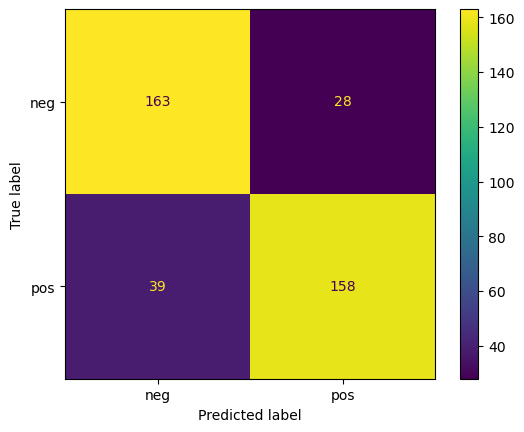

In [74]:
param = {'degree':np.arange(1,5) }
pipe1 = Pipeline([('Tfidf', TfidfVectorizer()),('gscv', GridSearchCV(SVC(),param_grid=param,cv=5)),])
pipe1.fit(X_train,y_train)
preds = pipe1.predict(X_test)
show_results(pipe1,y_test,preds)

In [ ]:
param = {'max_depth' :[3,5,7,10] ,'learning_rate': [0.01,0.05,0.1,0.5,5]   }
pipe2 = Pipeline([('Tfidf', TfidfVectorizer()),('gscv', GridSearchCV(GradientBoostingClassifier(),param_grid=param,cv=5)),])
pipe2.fit(X_train,y_train)
preds = pipe2.predict(X_test)
show_results(pipe2,y_test,preds)

In [60]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('Tfidf', TfidfVectorizer()),
                ('gbc', GradientBoostingClassifier(max_depth=5))])

In [61]:
preds = pipe.predict(X_test)

In [63]:
pipe.predict_proba(X_test)

array([[0.5247783 , 0.4752217 ],
       [0.92804947, 0.07195053],
       [0.19594306, 0.80405694],
       [0.60213599, 0.39786401],
       [0.4282104 , 0.5717896 ],
       [0.16025145, 0.83974855],
       [0.73301914, 0.26698086],
       [0.176418  , 0.823582  ],
       [0.69235937, 0.30764063],
       [0.79011836, 0.20988164],
       [0.79930884, 0.20069116],
       [0.43174966, 0.56825034],
       [0.30623281, 0.69376719],
       [0.68009922, 0.31990078],
       [0.78516252, 0.21483748],
       [0.17697069, 0.82302931],
       [0.83231759, 0.16768241],
       [0.98769494, 0.01230506],
       [0.42816961, 0.57183039],
       [0.86252905, 0.13747095],
       [0.477539  , 0.522461  ],
       [0.69859358, 0.30140642],
       [0.75125494, 0.24874506],
       [0.19823281, 0.80176719],
       [0.65235941, 0.34764059],
       [0.09950392, 0.90049608],
       [0.20775155, 0.79224845],
       [0.34025807, 0.65974193],
       [0.36263801, 0.63736199],
       [0.13249931, 0.86750069],
       [0.

**Creating a classification report and plot a confusion matrix based on the results of your PipeLine.**

In [64]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay,confusion_matrix

In [65]:
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

         neg       0.79      0.83      0.81       191
         pos       0.83      0.78      0.80       197

    accuracy                           0.81       388
   macro avg       0.81      0.81      0.81       388
weighted avg       0.81      0.81      0.81       388



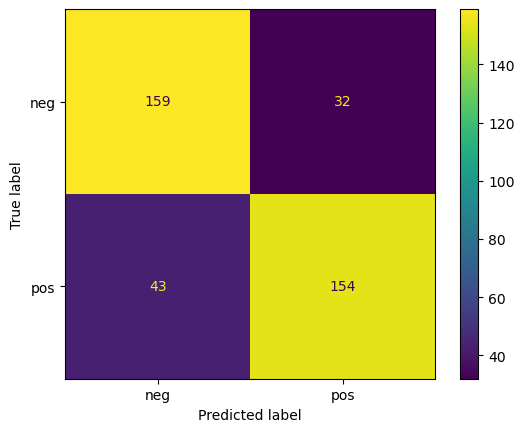

In [66]:
cm = confusion_matrix(y_test, preds ,labels=pipe.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)
disp.plot()

In [72]:
def show_results(pipe,y_test,preds):
    print(classification_report(y_test,preds))    
    
    cm = confusion_matrix(y_test, preds ,labels=pipe.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=pipe.classes_)
    disp.plot()